In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
x = np.array([1,2,3,4,5,6],dtype = float)
y = np.array([2,3,4,8,10,12],dtype= float)

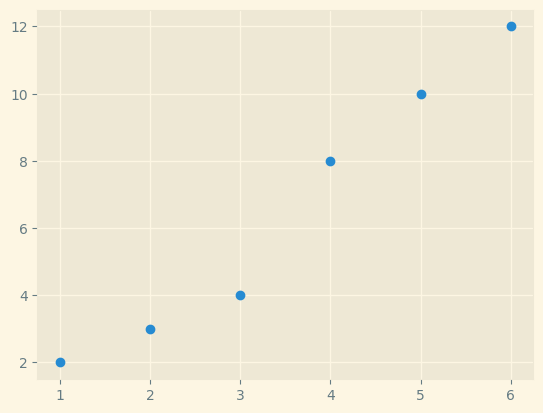

In [3]:
plt.style.use('Solarize_Light2')

plt.scatter(x, y)
plt.show()

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [5]:
model.compile(optimizer='adam', loss='mae')

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 1e-4):
            self.model.stop_training = True
            
cb = myCallback()

model.fit(x,y, epochs=500, steps_per_epoch=10, callbacks=cb)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 8.5491
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 9.8304
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 8.4667
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 8.5987
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 8.9248
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 8.9513
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 9.8038
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 7.9032
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 8.3934
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 7.9915
Epoch 11/500
10/10 [==============================] - 0s 2ms/step - loss: 9.6255
Epoch 12/500
10/10 [==============================] - 0s 2ms/step - loss: 8.1108
Epoch 13/500
10/10 [=================

10/10 [==============================] - 0s 3ms/step - loss: 4.6220
Epoch 103/500
10/10 [==============================] - 0s 4ms/step - loss: 4.7626
Epoch 104/500
10/10 [==============================] - 0s 3ms/step - loss: 4.7990
Epoch 105/500
10/10 [==============================] - 0s 3ms/step - loss: 4.6011
Epoch 106/500
10/10 [==============================] - 0s 3ms/step - loss: 5.3452
Epoch 107/500
10/10 [==============================] - 0s 3ms/step - loss: 3.1871
Epoch 108/500
10/10 [==============================] - 0s 3ms/step - loss: 5.2571
Epoch 109/500
10/10 [==============================] - 0s 3ms/step - loss: 4.5877
Epoch 110/500
10/10 [==============================] - 0s 3ms/step - loss: 4.2978
Epoch 111/500
10/10 [==============================] - 0s 3ms/step - loss: 4.5298
Epoch 112/500
10/10 [==============================] - 0s 3ms/step - loss: 4.2895
Epoch 113/500
10/10 [==============================] - 0s 4ms/step - loss: 4.6187
Epoch 114/500
10/10 [=========

10/10 [==============================] - 0s 3ms/step - loss: 2.2392
Epoch 203/500
10/10 [==============================] - 0s 3ms/step - loss: 1.6933
Epoch 204/500
10/10 [==============================] - 0s 3ms/step - loss: 2.4663
Epoch 205/500
10/10 [==============================] - 0s 3ms/step - loss: 1.7863
Epoch 206/500
10/10 [==============================] - 0s 3ms/step - loss: 2.1105
Epoch 207/500
10/10 [==============================] - 0s 3ms/step - loss: 2.4503
Epoch 208/500
10/10 [==============================] - 0s 4ms/step - loss: 2.0036
Epoch 209/500
10/10 [==============================] - 0s 4ms/step - loss: 2.0984
Epoch 210/500
10/10 [==============================] - 0s 4ms/step - loss: 2.1919
Epoch 211/500
10/10 [==============================] - 0s 4ms/step - loss: 2.1931
Epoch 212/500
10/10 [==============================] - 0s 4ms/step - loss: 2.0854
Epoch 213/500
10/10 [==============================] - 0s 4ms/step - loss: 1.9655
Epoch 214/500
10/10 [=========

10/10 [==============================] - 2s 223ms/step - loss: 1.6727


In [7]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.fashion_mnist.load_data()

In [8]:
print(y_train_raw[0])
print(x_train_raw.shape)
print(x_test_raw.shape)

9
(60000, 28, 28)
(10000, 28, 28)


In [9]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


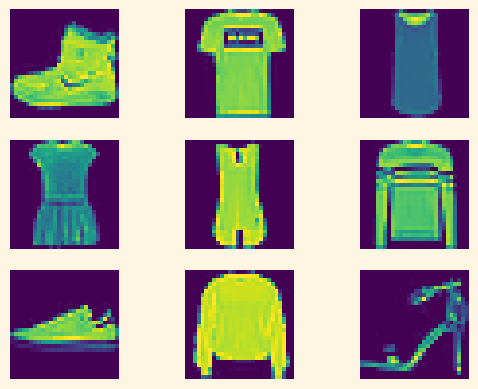

In [10]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [11]:
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [12]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 124)               31868     
                                                                 
 dense_4 (Dense)             (None, 128)               16000     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=[x_test, y_test])

Epoch 1/10
469/469 [==============================] - 10s 17ms/step - loss: 0.5055 - accuracy: 0.8190 - val_loss: 0.4040 - val_accuracy: 0.8481
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.3591 - accuracy: 0.8682 - val_loss: 0.3642 - val_accuracy: 0.8704
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3249 - accuracy: 0.8799 - val_loss: 0.3887 - val_accuracy: 0.8596
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2982 - accuracy: 0.8888 - val_loss: 0.3448 - val_accuracy: 0.8770
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2827 - accuracy: 0.8941 - val_loss: 0.3343 - val_accuracy: 0.8796
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2684 - accuracy: 0.8987 - val_loss: 0.3711 - val_accuracy: 0.8669
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2580 - accuracy: 0.9034 - val_loss: 0.3246 - val_accuracy: 0.882

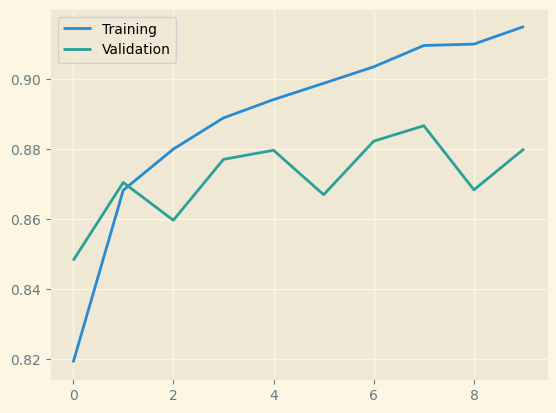

In [16]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3613 - accuracy: 0.8800


[0.36126115918159485, 0.8799999952316284]

In [18]:
model.save('model/model.h5')

In [19]:
model_saved = tf.keras.models.load_model('model/model.h5')
model_saved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 124)               31868     
                                                                 
 dense_4 (Dense)             (None, 128)               16000     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 2s 6ms/step - loss: 0.3613 - accuracy: 0.8800


[0.36126115918159485, 0.8799999952316284]

In [21]:
hasil = model_saved.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [22]:
x_train.shape

(60000, 784)

In [23]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

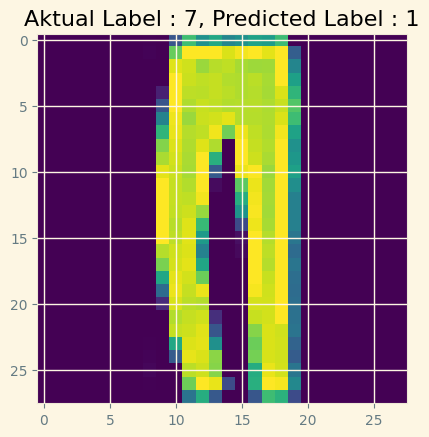

In [27]:
label = np.argmax(hasil,axis=1)
ActualLabel = np.argmax(y_test[22])

img = x_test[2].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[2]}")
plt.imshow(img)
plt.show()

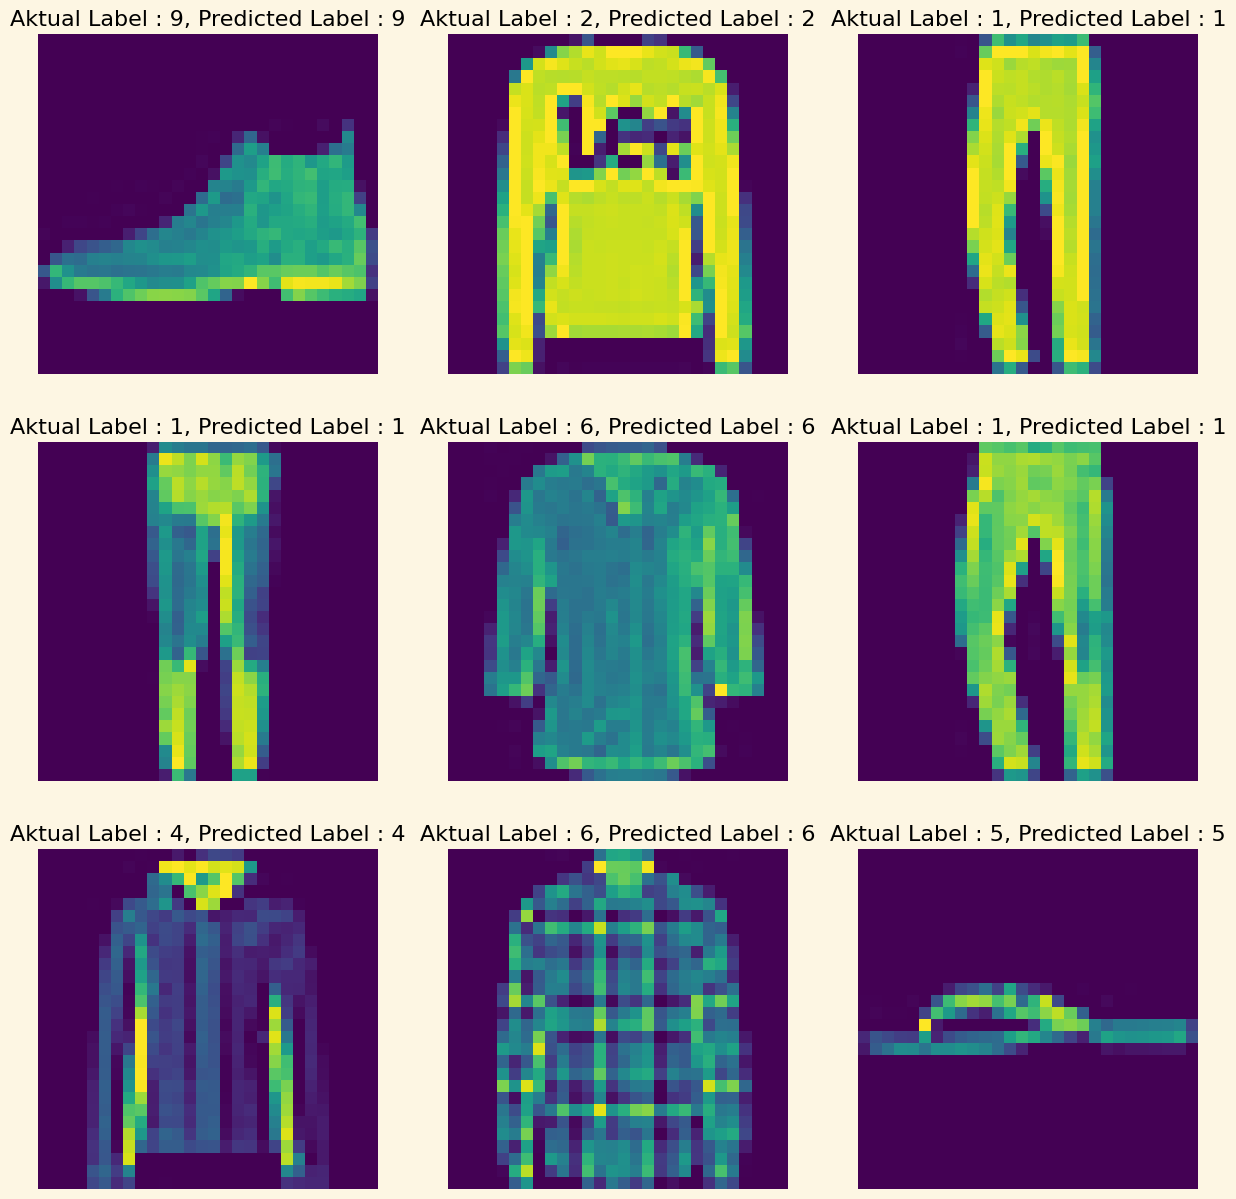

In [25]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)

  ActualLabel = np.argmax(y_test[i])
  plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[i]}")
  plt.imshow(x_test[i].reshape(28, 28))
  plt.axis('off')

plt.show()